In [1]:
# https://www.youtube.com/watch?v=Lsue2gEM9D0
import pandas as pd
import numpy as np
import random as rd
from sklearn.decomposition import PCA
from sklearn import preprocessing
import matplotlib.pyplot as plt

In [2]:
genes = ['gene' + str(i) for i in range(1, 101)]

wt = ['wt' + str(i) for i in range(1, 6)]
ko = ['ko' + str(i) for i in range(1, 6)]

data = pd.DataFrame(columns=[*wt, *ko], index=genes)

In [3]:
for gene in data.index:
    data.loc[gene, 'wt1':'wt5'] = np.random.poisson(lam=rd.randrange(10, 1000), size=5)
    data.loc[gene, 'ko1':'ko5'] = np.random.poisson(lam=rd.randrange(10, 1000), size=5)

data.head()

,wt1,wt2,wt3,wt4,wt5,ko1,ko2,ko3,ko4,ko5
gene1,725,612,664,611,642,31,55,44,36,50
gene2,91,70,85,83,74,649,606,660,629,610
gene3,32,34,33,31,27,891,990,913,895,947
gene4,50,47,72,60,61,854,831,819,894,900
gene5,354,388,360,355,352,36,43,25,33,29


In [4]:
data.shape

(100, 10)

In [5]:
# transpose of the data
data.T

,gene1,gene2,gene3,gene4,gene5,gene6,gene7,gene8,gene9,gene10,...,gene91,gene92,gene93,gene94,gene95,gene96,gene97,gene98,gene99,gene100
wt1,725,91,32,50,354,899,562,517,648,942,...,381,381,384,509,744,716,440,128,549,1006
wt2,612,70,34,47,388,893,553,498,681,978,...,330,380,411,503,736,717,435,142,548,969
wt3,664,85,33,72,360,927,570,473,668,971,...,352,361,371,560,758,774,475,138,563,941
wt4,611,83,31,60,355,936,528,534,680,930,...,364,340,390,528,734,678,437,126,603,976
wt5,642,74,27,61,352,870,571,552,623,890,...,346,389,429,523,685,718,456,138,585,993
ko1,31,649,891,854,36,919,944,198,476,492,...,801,603,961,623,1014,108,667,46,697,498
ko2,55,606,990,831,43,875,930,221,450,432,...,796,672,910,612,955,117,703,53,699,512
ko3,44,660,913,819,25,954,948,208,481,479,...,799,611,904,635,937,112,690,67,668,463
ko4,36,629,895,894,33,874,941,187,479,465,...,844,586,915,657,1007,114,690,47,654,472
ko5,50,610,947,900,29,953,948,194,423,458,...,795,677,928,644,953,96,641,51,669,444


In [6]:
scaled_data = preprocessing.scale(data.T)
# StandardScaler().fit_transform(data.T)

In [7]:
pca = PCA()
pca.fit(scaled_data) # calculate loading scores and the variation
pca_data = pca.transform(scaled_data) # generate coordinates

In [8]:
per_var = np.round(pca.explained_variance_ratio_*100, decimals=1)
labels = ['PC' + str(x) for x in range(1, len(per_var)+1)]

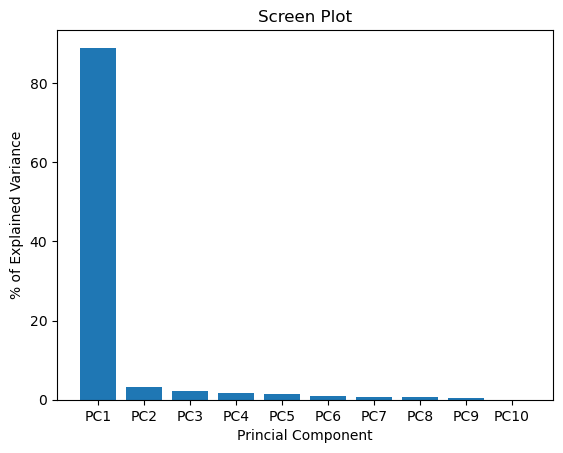

In [9]:
plt.bar(x=range(1, len(per_var)+1), height=per_var, tick_label=labels)
plt.ylabel('% of Explained Variance')
plt.xlabel('Princial Component')
plt.title('Screen Plot')
plt.show()

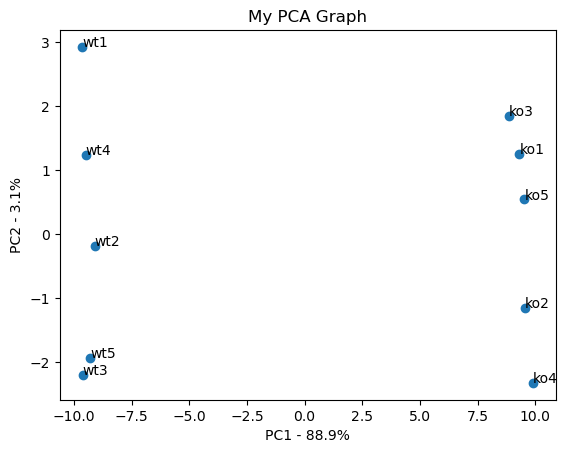

In [11]:
pca_df = pd.DataFrame(pca_data, index=[*wt, *ko], columns=labels)

plt.scatter(pca_df.PC1, pca_df.PC2)
plt.title('My PCA Graph')
plt.xlabel(f'PC1 - {per_var[0]}%')
plt.ylabel(f'PC2 - {per_var[1]}%')

for sample in pca_df.index:
    plt.annotate(sample, (pca_df.PC1.loc[sample], pca_df.PC2.loc[sample]))
    
plt.show()

In [14]:
# the loading scores for PC1 to determine which genes had the largest influence on separating the two clusters along the x-axis.
loading_scores = pd.Series(pca.components_[0], index=genes)
sorted_loading_scores = loading_scores.abs().sort_values(ascending=False)

top_10_genes = sorted_loading_scores[0:10].index.values # top 10 genes
loading_scores[top_10_genes]

gene34   -0.105979
gene77    0.105966
gene14    0.105964
gene56   -0.105964
gene74    0.105953
gene37   -0.105936
gene4     0.105918
gene32    0.105906
gene45   -0.105898
gene59    0.105895
dtype: float64